<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#How-to-use" data-toc-modified-id="How-to-use-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>How to use</a></span><ul class="toc-item"><li><span><a href="#President's-race-stats" data-toc-modified-id="President's-race-stats-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>President's race stats</a></span></li><li><span><a href="#Other-races" data-toc-modified-id="Other-races-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other races</a></span></li><li><span><a href="#Election2020RawJson" data-toc-modified-id="Election2020RawJson-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Election2020RawJson</a></span></li></ul></li><li><span><a href="#How-I-got-there" data-toc-modified-id="How-I-got-there-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How I got there</a></span><ul class="toc-item"><li><span><a href="#Getting-the-state-stubs" data-toc-modified-id="Getting-the-state-stubs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Getting the state stubs</a></span></li><li><span><a href="#Getting-the-json" data-toc-modified-id="Getting-the-json-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Getting the json</a></span></li></ul></li></ul></div>

# How to use

In [5]:
import pandas as pd
from elections import President2020TimeSeries, Races2020, Election2020RawJson


## President's race stats

In [196]:
s = President2020TimeSeries()
len(s)

51

`s` is a dictionary-like interface to the presidential race. 

It's keys are the states

In [197]:
print(*s)

alabama alaska arizona arkansas california colorado connecticut delaware district-of-columbia florida georgia hawaii idaho illinois indiana iowa kansas kentucky louisiana maine maryland massachusetts michigan minnesota mississippi missouri montana nebraska nevada new-hampshire new-jersey new-mexico new-york north-carolina north-dakota ohio oklahoma oregon pennsylvania rhode-island south-carolina south-dakota tennessee texas utah vermont virginia washington west-virginia wisconsin wyoming


It's values are dataframes containing the stats.

In [198]:
state = 'georgia'
df = s[state]
df

,votes,eevp,eevp_source,trumpd,bidenj
timestamp,,,,,
2020-11-04T09:23:03Z,0,0,edison,0.000,0.000
2020-11-04T00:14:11Z,408,0,edison,0.674,0.326
2020-11-04T00:15:51Z,127106,2,edison,0.370,0.618
2020-11-04T00:19:55Z,173638,3,edison,0.431,0.557
2020-11-04T00:21:57Z,174006,3,edison,0.432,0.557
...,...,...,...,...,...
2020-11-06T23:14:40Z,4969860,99,edison,0.493,0.494
2020-11-06T23:17:43Z,4969869,99,edison,0.493,0.494
2020-11-06T23:36:39Z,4969873,99,edison,0.493,0.494


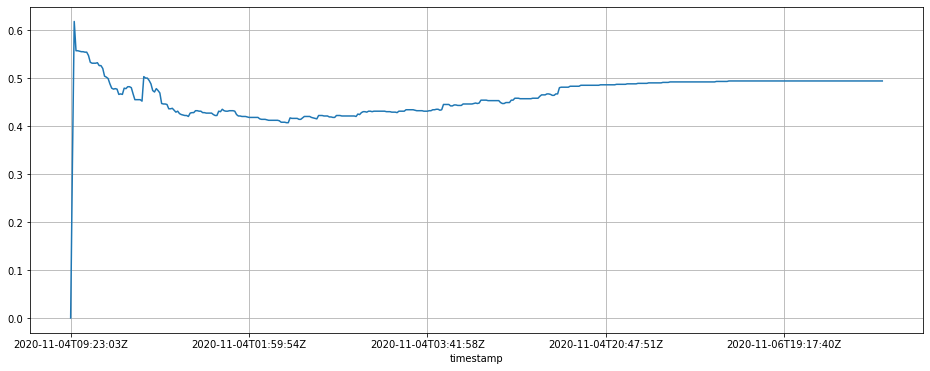

In [199]:
df['bidenj'].plot(figsize=(16, 6), grid=True, title=state);

## Other races

But that's not the only race going on here. 

In [7]:
s = Races2020()
len(s)

51

In [8]:
data = s['new-york']   # by the way, you can tab-complete this if you're working in a jupyter notebook
print(type(data))
print(f"{len(data)} items... Here are the first 5:")
list(data)[:5]

<class 'py2store.base.Store'>
242 items... Here are the first 5:


['president-general-2020-11-03',
 'house-general-district-001-2020-11-03',
 'house-general-district-002-2020-11-03',
 'house-general-district-003-2020-11-03',
 'house-general-district-004-2020-11-03']

So we see that now, instead of just getting the president's race, we get... 242 races (one of which is the president's race). 

What you need to know, as well, is that `President2020TimeSeries` just gave you one of the many datas available for the race (the 'timeseries' one), extracted and formated for your convenience, since it's probably the main information you're here for. 

But there are other associated (raw) datas you may or may not be interested in. Here's what you got:

In [9]:
data['president-general-2020-11-03'].keys()  # you can tab complete here as well (you're welcome!)

dict_keys(['race_id', 'race_slug', 'url', 'state_page_url', 'ap_polls_page', 'edison_exit_polls_page', 'race_type', 'election_type', 'election_date', 'runoff', 'race_name', 'office', 'officeid', 'race_rating', 'seat', 'seat_name', 'state_id', 'state_slug', 'state_name', 'state_nyt_abbrev', 'state_shape', 'party_id', 'uncontested', 'report', 'result', 'result_source', 'gain', 'lost_seat', 'votes', 'electoral_votes', 'absentee_votes', 'absentee_counties', 'absentee_count_progress', 'absentee_outstanding', 'absentee_max_ballots', 'provisional_outstanding', 'provisional_count_progress', 'poll_display', 'poll_countdown_display', 'poll_waiting_display', 'poll_time', 'poll_time_short', 'precincts_reporting', 'precincts_total', 'reporting_display', 'reporting_value', 'eevp', 'tot_exp_vote', 'eevp_source', 'eevp_value', 'eevp_display', 'county_data_source', 'incumbent_party', 'no_forecast', 'last_updated', 'candidates', 'has_incumbent', 'leader_margin_value', 'leader_margin_votes', 'leader_marg

In [15]:
t = data['president-general-2020-11-03']
print(t['trump2016'], t['clinton2016'])

2819534 4556124


## Election2020RawJson

But if you want even more, and even more raw than the above, we can give that to you. 

With `Election2020RawJson` you get access to the original full json. 

In [214]:
raw_jsons = Election2020RawJson()
json_data = raw_jsons['california']
json_data.keys()

dict_keys(['data', 'meta'])

In [215]:
json_data['meta']

{'version': 10403,
 'track': '2020-11-03',
 'timestamp': '2020-11-06T23:52:57.623Z'}

In [216]:
json_data['data'].keys()

dict_keys(['races', 'party_control', 'liveUpdates'])

In [224]:
pd.DataFrame(json_data['data']['party_control']).set_index('race_type').T

race_type,house,president,senate
state_id,,,
needed_for_control,218,270,50
total,435,538,100
no_election,{},{},"{'democrat': 35, 'republican': 30, 'other': 0}"
winner,False,False,False
parties,"{'democrat': {'party_id': 'democrat', 'name_di...","{'democrat': {'party_id': 'democrat', 'name_di...","{'democrat': {'party_id': 'democrat', 'name_di..."
winnerCalledTimestamp,None,None,None


In [225]:
pd.DataFrame(json_data['data']['liveUpdates'])

,id,author,author_title_or_location,text,link_url,link_text,linked_state_1,linked_state_2,linked_state_3,image_url,...,call_type,race_id,winner,party_id,candidate_last_name,candidate_name_display,candidate_id,race_call_party_winner,state_name,link
0,333,Nate Cohn,in New York,New ballots from Clark County (that’s Las Vega...,,,NV,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,332,Nate Cohn,in New York,The latest Arizona ballot releases aren’t look...,,,AZ,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,331,Nick Corasaniti,in Philadelphia,"There are still 102,000 mail ballots to be cou...",,,PA,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,330,Dave Philipps,in Las Vegas,"Biden nets 2,520 votes in the Las Vegas area, ...",,,NV,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,329,Katie Glueck,"in Wilmington, Del.",I’m told Biden spent the day watching election...,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,5,Nate Cohn,in New York,"Tonight, the needle will be back — sort of. We...",https://www.nytimes.com/2020/11/02/upshot/need...,Learn more about the needle,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,4,Sheera Frenkel,in Silicon Valley,Times tech reporters will be monitoring for mi...,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,3,Michael Barbaro,in New York,"From 4 p.m. to 8 p.m. Eastern time, we’ll be t...",https://nytimes.com/thedaily,Listen here,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,2,Trip Gabriel,"in Butler County, Pa.",A look at Trump and the G.O.P.’s closing strat...,https://www.nytimes.com/2020/11/02/us/politics...,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# How I got there

## Getting the state stubs

In [80]:
import re
t = '"<select class="e-hp-nav-item"> <option value="" selected="selected">Select a state</option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-alabama.html"> Alabama </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-alaska.html"> Alaska </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-arizona.html"> Arizona </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-arkansas.html"> Arkansas </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-california.html"> California </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-colorado.html"> Colorado </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-connecticut.html"> Connecticut </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-delaware.html"> Delaware </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-district-of-columbia.html"> District of Columbia </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-florida.html"> Florida </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-georgia.html"> Georgia </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-hawaii.html"> Hawaii </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-idaho.html"> Idaho </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-illinois.html"> Illinois </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-indiana.html"> Indiana </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-iowa.html"> Iowa </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-kansas.html"> Kansas </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-kentucky.html"> Kentucky </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-louisiana.html"> Louisiana </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-maine.html"> Maine </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-maryland.html"> Maryland </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-massachusetts.html"> Massachusetts </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-michigan.html"> Michigan </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-minnesota.html"> Minnesota </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-mississippi.html"> Mississippi </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-missouri.html"> Missouri </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-montana.html"> Montana </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-nebraska.html"> Nebraska </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-nevada.html"> Nevada </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-new-hampshire.html"> New Hampshire </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-new-jersey.html"> New Jersey </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-new-mexico.html"> New Mexico </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-new-york.html"> New York </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-north-carolina.html"> North Carolina </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-north-dakota.html"> North Dakota </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-ohio.html"> Ohio </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-oklahoma.html"> Oklahoma </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-oregon.html"> Oregon </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-pennsylvania.html"> Pennsylvania </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-rhode-island.html"> Rhode Island </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-south-carolina.html"> South Carolina </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-south-dakota.html"> South Dakota </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-tennessee.html"> Tennessee </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-texas.html"> Texas </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-utah.html"> Utah </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-vermont.html"> Vermont </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-virginia.html"> Virginia </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-washington.html"> Washington </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-west-virginia.html"> West Virginia </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-wisconsin.html"> Wisconsin </option> <option value="https://www.nytimes.com/interactive/2020/11/03/us/elections/results-wyoming.html"> Wyoming </option> </select>"'

state_stubs = re.findall('us/elections/results-([\w-]+).html', t)


In [84]:
print(*(f"'{x}'" for x in state_stubs), sep=', ')

'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'district-of-columbia', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new-hampshire', 'new-jersey', 'new-mexico', 'new-york', 'north-carolina', 'north-dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode-island', 'south-carolina', 'south-dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west-virginia', 'wisconsin', 'wyoming'


In [85]:
state_stubs = ['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 
               'connecticut', 'delaware', 'district-of-columbia', 'florida', 'georgia', 
               'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 
               'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 
               'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new-hampshire', 
               'new-jersey', 'new-mexico', 'new-york', 'north-carolina', 'north-dakota', 'ohio', 
               'oklahoma', 'oregon', 'pennsylvania', 'rhode-island', 'south-carolina', 'south-dakota', 
               'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west-virginia', 
               'wisconsin', 'wyoming']

## Getting the json

In [89]:
data = get_json_for_state('new-york')
data.keys()

dict_keys(['data', 'meta'])

In [90]:
data['meta']

{'version': 10197,
 'track': '2020-11-03',
 'timestamp': '2020-11-06T22:45:58.501Z'}

In [91]:
data['data'].keys()

dict_keys(['races', 'party_control', 'liveUpdates'])

In [97]:
set(x['race_slug'] for x in data['data']['races'])

{'ny-boro-pres-queens-general-district-004-2020-11-03',
 'ny-house-general-district-001-2020-11-03',
 'ny-house-general-district-002-2020-11-03',
 'ny-house-general-district-003-2020-11-03',
 'ny-house-general-district-004-2020-11-03',
 'ny-house-general-district-005-2020-11-03',
 'ny-house-general-district-006-2020-11-03',
 'ny-house-general-district-007-2020-11-03',
 'ny-house-general-district-008-2020-11-03',
 'ny-house-general-district-009-2020-11-03',
 'ny-house-general-district-010-2020-11-03',
 'ny-house-general-district-011-2020-11-03',
 'ny-house-general-district-012-2020-11-03',
 'ny-house-general-district-013-2020-11-03',
 'ny-house-general-district-014-2020-11-03',
 'ny-house-general-district-015-2020-11-03',
 'ny-house-general-district-016-2020-11-03',
 'ny-house-general-district-017-2020-11-03',
 'ny-house-general-district-018-2020-11-03',
 'ny-house-general-district-019-2020-11-03',
 'ny-house-general-district-020-2020-11-03',
 'ny-house-general-district-021-2020-11-03',

In [96]:
len(set(x['race_slug'] for x in data['data']['races'])), len(data['data']['races'])

(242, 242)